"
Par Inc., is a major manufacturer of golf equipment. Management believes that Par’s market share could be increased with the introduction of a cutresistant, longer-lasting golf ball. Therefore, the research group at Par has been investigating a new golf ball coating designed to resist cuts and provide a more durable ball. The tests with the coating have been promising.

One of the researchers voiced concern about the effect of the new coating on driving distances. Par would like the new cut-resistant ball to offer driving distances comparable to those of the current-model golf ball.

To compare the driving distances for the two balls, 40 balls of both the new and current models were subjected to distance tests.

The testing was performed with a mechanical hitting machine so that any difference between the mean distances for the two models could be attributed to a difference in the design.

The results of the tests, with distances measured to the nearest yard, are contained in the data set “Golf”.

Prepare a M
"
Prepare a Managerial Report

Formulate and present the rationale for a hypothesis test that par could use to compare the driving distances of the current and new golf balls

Analyze the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for Par Inc.?

Do you see a need for larger sample sizes and more testing with the golf balls? Discuss.

Following are the assumptions we are considering before we proceed:-


1) Null Hypothesis : The mean driving distances for the current and new golf balls are same. In other words the difference between mean driving distances for the two models is zero

2)Alternate Hypothesis: It is opposite to null hypothesis hence it states that mean driving distances for the current and new golf balls is different

3) Significance level = 0.05

Step 1) Import pandas, numpy, ttest_ind, levene, shapiro, iqr, matplotlib.pyplot

In [43]:
import numpy as np
from scipy.stats import ttest_ind, levene, shapiro, iqr, mannwhitneyu, wilcoxon
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Step 2) Get the data

In [44]:
mydata = pd.read_excel("SM4-Golf.xls")
mydata.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


Step 3) check if columns has any other value other than numeric

In [45]:
mydata[~mydata.applymap(np.isreal).all(1)]

,Current,New


It is clear that all the values are numeric

Step 4) Check for the Descriptive Statistics.

In [46]:
mydata.describe()

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


In [47]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
Current    40 non-null int64
New        40 non-null int64
dtypes: int64(2)
memory usage: 720.0 bytes


Now we are sure that there are no null values are present in the dataset provided

Step 5) Plot histograms for the columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002216F41C9E8>]],
      dtype=object)

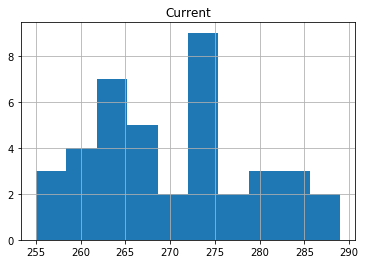

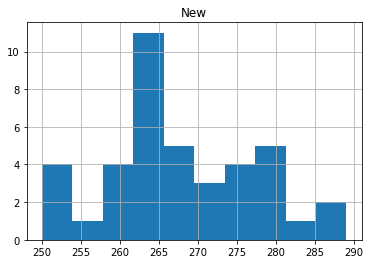

In [48]:
mydata.hist(column='Current')
mydata.hist(column='New')

For the current golf balls most of the frquency is lying between 271-275. For new golf balls most of the frequency is lying between 261-266

Step 6) Check if shapiro and levene tets work fine for the data.

In [49]:
a=mydata["Current"]
b=mydata["New"]
shapiro(a)

(0.9707046747207642, 0.378787100315094)

In [50]:
shapiro(b)

(0.9678263664245605, 0.3064655363559723)

The single univariate distribution is normally distributed since the p value is greater than 0.05 for both the cases

In [51]:
levene( a,b)

LeveneResult(statistic=0.2553238291765741, pvalue=0.6147759523331309)

The variance across multiple groups are same as the p value is greater than 0.05.

Step 7) Calculate Pooled Standard Deviation

In [52]:
std_current=a.std()
std_new=b.std()

In [53]:
print(std_current,std_new)

8.752984838884597 9.896904462947894


In [54]:
s=np.sqrt(((8.753**2)+(9.897**2))/2)

In [55]:
s

9.342526906570834

Step 8) Calculate Sample power

In [56]:
import scipy
def sample_power_difftest(d,s,power=0.8,sig=0.05):
    z = scipy.stats.norm.isf([sig/2])
    zp = -1 * scipy.stats.norm.isf([power])
    n = (2*(s**2)) * ((zp+z)**2) / (d**2)
    return int(round(n[0]))

In [57]:
mean_current=a.mean()
mean_new=b.mean()
d=mean_current-mean_new
d

2.7749999999999773

In [58]:
n=sample_power_difftest(d,s,power=0.8,sig=0.5)

In [59]:
n

52

This states that minimum 52 samples are needed for conducting the test successfully and that we do not have enough samples for the test.

Step 9) Calculate z value mathematically

In [60]:
z_value =  (mean_current-mean_new)/(std_new/np.sqrt(40))

In [61]:
z_value

1.7733465125020238

Step 10) Calculate z_statistics value and p value using wilcoxon(z test)

In [62]:
z_statistic,p_value = wilcoxon(b-a)

In [63]:
print(z_statistic,p_value)

291.5 0.2516033447950283


From the p_value(0.25) we get to know that null hypothesis should be accepted as p_value is greater than 0.05 and that we need to reject the alternate hypothesis.

Step 11) Calulating u value and p value using mannwhitneyu

In [64]:
u, p_value = mannwhitneyu(a,b)

In [65]:
print(u, p_value)

668.0 0.10265192122893124


From the p_value(0.10) we get to know that null hypothesis should be accepted as p_value is greater than 0.05 and that we need to reject the alternate hypothesis.

Step 12) Calculating t_statistics and p value using ttest_ind

In [66]:
t_statistic, p_value = ttest_ind(a, b)
print(t_statistic,p_value)

1.3283615935245678 0.18793228491854663


From the p_value(0.19) we get to know that null hypothesis should be accepted as p_value is greater than 0.05 and that we need to reject the alternate hypothesis.

Step 13) Calculating the power of test

In [67]:
delta = (np.mean(a) - np.mean(b)) / np.sqrt(((40-1)*np.var(a) + (41-1)*np.var(b)) / 40+40-2)

In [68]:
delta

0.19318784973815104

In [69]:
from statsmodels.stats.power import ttest_power
power_of_test = ttest_power(delta, nobs=40, alpha=0.05, alternative="two-sided")

In [70]:
power_of_test

0.2220256974037293

From the power of test conducted we get to know that only 22% chances exists in rejecting the null hypothesis hence null hypothesis needs to be accepted.

Conclusions:-

1) All the values are numeric


2) There are no null values present in the dataset provided


3) For the current golf balls most of the frquency is lying between 271-275. For new golf balls most of the frequency is lying    between 261-266


4) The single univariate distribution is normally distributed since the p value from shapiro test is greater than 0.05 for both    the models


5) The variance across multiple groups are same as the p value from Levene test is greater than 0.05.


6) From sample power we get to know, minimum 52 samples are needed for conducting the test successfully and that we do not have    enough samples for the test.


7) The p-value for z-test, u-test(mannwhitneyu) and 2 sample t-test are greater than 0.05 hence we accept the null hypothesis      rejecting the alternate hypothesis


8) The power of test shows a very less chance to reject the null hypothesis hence we need to accept the null hypothesis.

 What is the p-value for your test? What is your recommendation for Par Inc.?
 
Since this test falls under unpad testing and that the distribution is normally distributed hence the we can take the p-value for 2-sample-t test which comes out to be 0.19. Again as the sample size is greater than 30 we can also note the p-value from the z-test that is 0.25. In both the cases the p-value>0.05 thus concluding that null hypothesis should be accepted

Recommendation: Par Inc. should introduce the new model in the market as the mean driving distances of both the current and new models are same, and is not affected by the new coating. 

Do you see a need for larger sample sizes and more testing with the golf balls?


Ans. Yes there is a need for larger sample size. From sample power we find there should be miniumum 52 samples needed however we have only 40 samples